# 1. Data Exploration

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import streamlit as st
import joblib

In [2]:
! pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 9.9/9.9 MB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 6.9/6.9 MB 1.4 MB/s eta 0:00:00
  Using cached cachetools-5.5.2-py3-none-any.whl (10 kB)
     ------------------------------------ 731.2/731.2 kB 904.6 kB/s eta 0:00:00
     ---------------------------------------- 25.8/25.8 MB 1.5 MB/s eta 0:00:00
     -------------------------------------- 207.6/207.6 kB 4.2 MB/s eta 0:00:00
     -------------------------------------- 358.0/358.0 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 62.8/62.8 kB 1.1 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## Load dataset

In [4]:
train_df = pd.read_csv(r"C:\Users\vikes\Downloads\Logistic Regression\Logistic Regression\Titanic_train.csv")
test_df = pd.read_csv(r"C:\Users\vikes\Downloads\Logistic Regression\Logistic Regression\Titanic_test.csv")


## a. Exploratory Data Analysis

In [7]:
print("\n--- Head of Training Dataset ---")
print(train_df.head())

print("\n--- Data Info ---")
print(train_df.info())

print("\n--- Summary Statistics ---")
print(train_df.describe(include='all'))


--- Head of Training Dataset ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3

## b. Visualizations

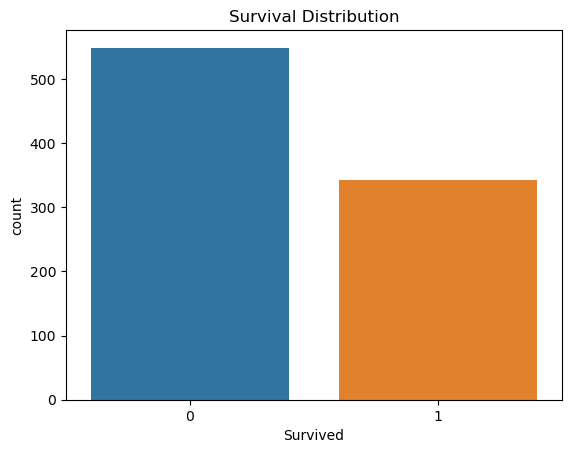

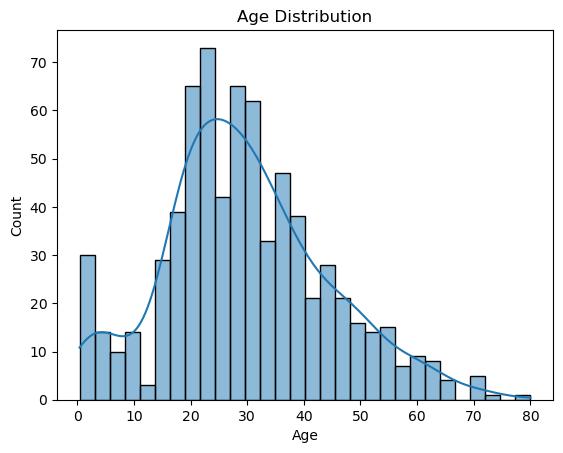

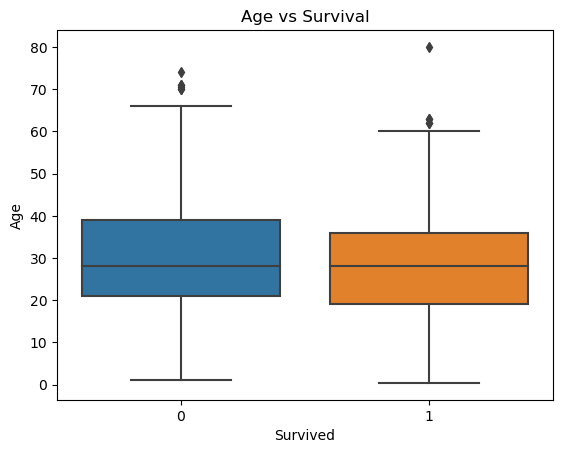

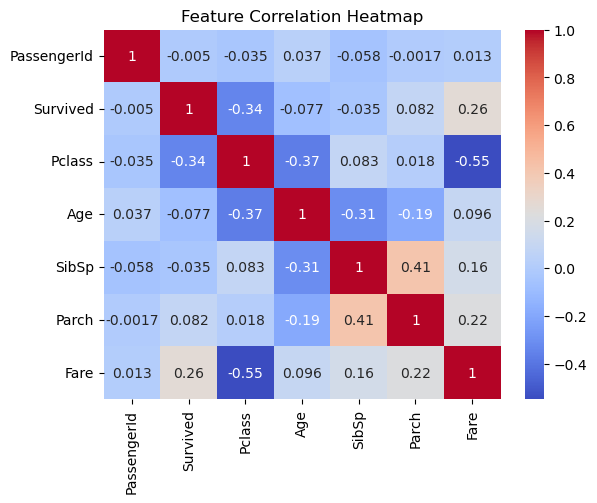

In [8]:
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Distribution')
plt.show()

sns.histplot(train_df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title('Age vs Survival')
plt.show()

sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# 2. Data Preprocessing

## a. Handle missing values

In [9]:

train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df.drop(['Cabin'], axis=1, inplace=True)  # too many missing values



## b. Encode categorical variables

In [10]:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

# Drop irrelevant columns
train_df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


# 3. Model Building

In [11]:
# Define features and target
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Split the training data for internal validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# 4. Model Evaluation


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



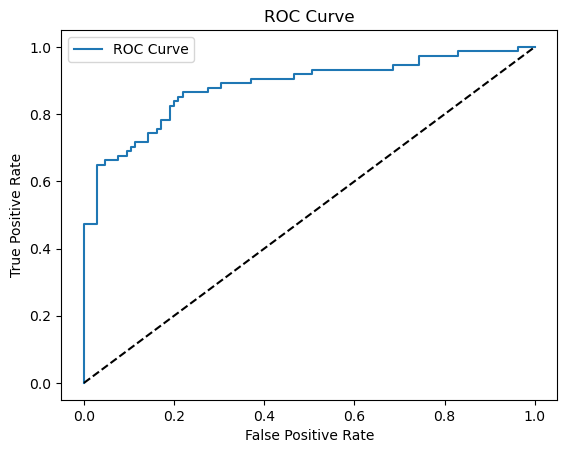

['logistic_model.pkl']

In [12]:
# Predict and evaluate
y_pred = model.predict(X_val)
print("\n--- Classification Report ---")
print(classification_report(y_val, y_pred))

# ROC Curve
y_pred_proba = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Save model
joblib.dump(model, 'logistic_model.pkl')

# 5. Interpretation

In [13]:
print("\n--- Model Coefficients ---")
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print(coef_df.sort_values(by='Coefficient', key=abs, ascending=False))


--- Model Coefficients ---
      Feature  Coefficient
5    Sex_male    -2.591709
0      Pclass    -0.938155
7  Embarked_S    -0.399204
2       SibSp    -0.295571
6  Embarked_Q    -0.112097
3       Parch    -0.108095
1         Age    -0.030595
4        Fare     0.002580
